<a href="https://colab.research.google.com/github/azarya23/hackbio-biocoding-internship./blob/main/STAGE_2_task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


df = pd.read_csv("https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/nhanes.csv")
df.head()


,id,Gender,Age,Race,Education,MaritalStatus,RelationshipStatus,Insured,Income,Poverty,...,Diabetes,DiabetesAge,nPregnancies,nBabies,SleepHrsNight,PhysActive,PhysActiveDays,AlcoholDay,AlcoholYear,SmokingStatus
0,62163,male,14,Asian,NaN,NaN,NaN,Yes,100000.0,4.07,...,No,NaN,NaN,NaN,NaN,No,1.0,NaN,NaN,NaN
1,62172,female,43,Black,High School,NeverMarried,Single,Yes,22500.0,2.02,...,No,NaN,3.0,2.0,8.0,No,2.0,3.0,104.0,Current
2,62174,male,80,White,College Grad,Married,Committed,Yes,70000.0,4.30,...,No,NaN,NaN,NaN,9.0,No,7.0,NaN,0.0,Never
3,62174,male,80,White,College Grad,Married,Committed,Yes,70000.0,4.30,...,No,NaN,NaN,NaN,9.0,No,5.0,NaN,0.0,Never
4,62175,male,5,White,NaN,NaN,NaN,Yes,12500.0,0.39,...,No,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5000 non-null   int64  
 1   Gender              5000 non-null   object 
 2   Age                 5000 non-null   int64  
 3   Race                5000 non-null   object 
 4   Education           3584 non-null   object 
 5   MaritalStatus       3585 non-null   object 
 6   RelationshipStatus  3585 non-null   object 
 7   Insured             4993 non-null   object 
 8   Income              4623 non-null   float64
 9   Poverty             4675 non-null   float64
 10  HomeRooms           4972 non-null   float64
 11  HomeOwn             4972 non-null   object 
 12  Work                3842 non-null   object 
 13  Weight              4969 non-null   float64
 14  Height              4841 non-null   float64
 15  BMI                 4834 non-null   float64
 16  Pulse 

In [10]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Race,0
Education,1416
MaritalStatus,1415
RelationshipStatus,1415
Insured,7
Income,377
Poverty,325


In [12]:

df.replace(np.nan, 0, inplace=True)
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Race,0
Education,0
MaritalStatus,0
RelationshipStatus,0
Insured,0
Income,0
Poverty,0


In [14]:
df['Weight_pounds'] = df['Weight'] * 2.2
df.head()

,id,Gender,Age,Race,Education,MaritalStatus,RelationshipStatus,Insured,Income,Poverty,...,DiabetesAge,nPregnancies,nBabies,SleepHrsNight,PhysActive,PhysActiveDays,AlcoholDay,AlcoholYear,SmokingStatus,Weight_pounds
0,62163,male,14,Asian,0,0,0,Yes,100000.0,4.07,...,0.0,0.0,0.0,0.0,No,1.0,0.0,0.0,0,108.68
1,62172,female,43,Black,High School,NeverMarried,Single,Yes,22500.0,2.02,...,0.0,3.0,2.0,8.0,No,2.0,3.0,104.0,Current,216.92
2,62174,male,80,White,College Grad,Married,Committed,Yes,70000.0,4.30,...,0.0,0.0,0.0,9.0,No,7.0,0.0,0.0,Never,210.76
3,62174,male,80,White,College Grad,Married,Committed,Yes,70000.0,4.30,...,0.0,0.0,0.0,9.0,No,5.0,0.0,0.0,Never,210.76
4,62175,male,5,White,0,0,0,Yes,12500.0,0.39,...,0.0,0.0,0.0,0.0,0,7.0,0.0,0.0,0,52.58


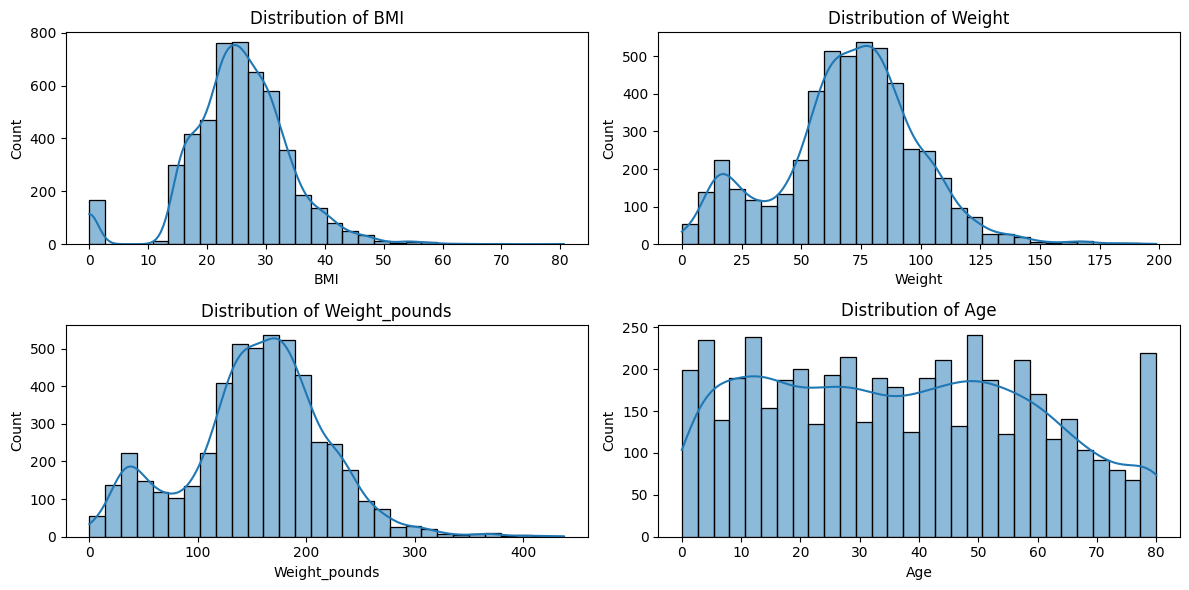

In [16]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(["BMI", "Weight", "Weight_pounds", "Age"], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


In [18]:
mean_pulse_rate = df["Pulse"].mean()
print(f"Mean 60-second pulse rate: {mean_pulse_rate}")

diastolic_min = df["BPDia"].min()
diastolic_max = df["BPDia"].max()
print(f"Range of diastolic blood pressure: {diastolic_min} - {diastolic_max}")

income_variance = df['Income'].var()
income_std_dev = df['Income'].std()
print(f"Income Variance: {round(income_variance, 2)}")
print(f"Income Standard Deviation: {round(income_std_dev, 2)}")



Mean 60-second pulse rate: 63.06
Range of diastolic blood pressure: 0.0 - 116.0
Income Variance: 1264147753.55
Income Standard Deviation: 35554.86


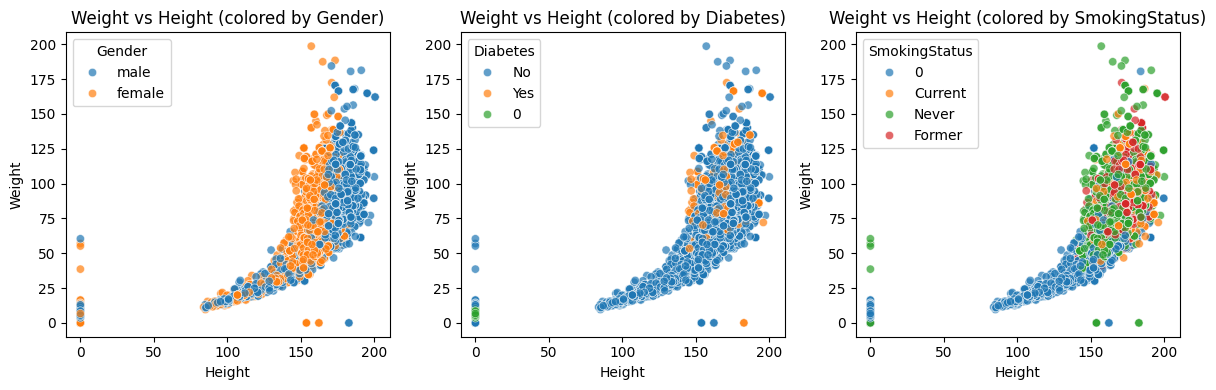

In [19]:
plt.figure(figsize=(12, 4))
for i, hue in enumerate(['Gender', 'Diabetes', 'SmokingStatus'], 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df, x='Height', y='Weight', hue=hue, alpha=0.7)
    plt.title(f'Weight vs Height (colored by {hue})')
plt.tight_layout()
plt.show()

In [20]:
# T-Tests
# Age vs Gender
t_stat, p_val = ttest_ind(df[df['Gender'] == 'male']['Age'], df[df['Gender'] == 'female']['Age'], nan_policy='omit')
print(f"T-test Age vs Gender: p-value = {p_val:.5f}")

# BMI vs Diabetes
t_stat, p_val = ttest_ind(df[df['Diabetes'] == 'Yes']['BMI'], df[df['Diabetes'] == 'No']['BMI'], nan_policy='omit')
print(f"T-test BMI vs Diabetes: p-value = {p_val:.5f}")

# Alcohol Year vs Relationship Status
t_stat, p_val = ttest_ind(df[df['RelationshipStatus'] == 'Committed']['AlcoholYear'], df[df['RelationshipStatus'] == 'Single']['AlcoholYear'], nan_policy='omit')
print(f"T-test Alcohol Year vs Relationship Status: p-value = {p_val:.5f}")


T-test Age vs Gender: p-value = 0.08020
T-test BMI vs Diabetes: p-value = 0.00000
T-test Alcohol Year vs Relationship Status: p-value = 0.00000
